<a href="https://colab.research.google.com/github/thompf2/Machine-Learning-Engineering/blob/main/MLE_Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM #1:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# load the dataset
data = load_wine()
X = data.data
y = data.target

# PART A

# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA, 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# print the first two principal components
print("First two principal components (first 5 samples):")
print(X_pca[:5])





First two principal components (first 5 samples):
[[ 3.31675081  1.44346263]
 [ 2.20946492 -0.33339289]
 [ 2.51674015  1.0311513 ]
 [ 3.75706561  2.75637191]
 [ 1.00890849  0.86983082]]


In [12]:
# PART B

# get the explained variance ratio for each component
print(pca.explained_variance_ratio_[:2])

[0.36198848 0.1920749 ]


In [13]:
# PART C

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42, stratify=y)

# train SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)


In [14]:
# PART D

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# SVM eval
print("SVM Performance on PCA Features:")
print(classification_report(y_test, y_pred))

# decision tree classifier
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# create decision tree, max dept = 3
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_orig, y_train)

y_pred_dt = dt.predict(X_test_orig)

# decision tree eval
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))





SVM Performance on PCA Features:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.93      0.93      0.93        29
           2       1.00      1.00      1.00        19

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.94      0.94      0.94        72

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        19

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



The accuracy, precision, and recall of the decision tree classifier are higher than that of the SVM classifier.


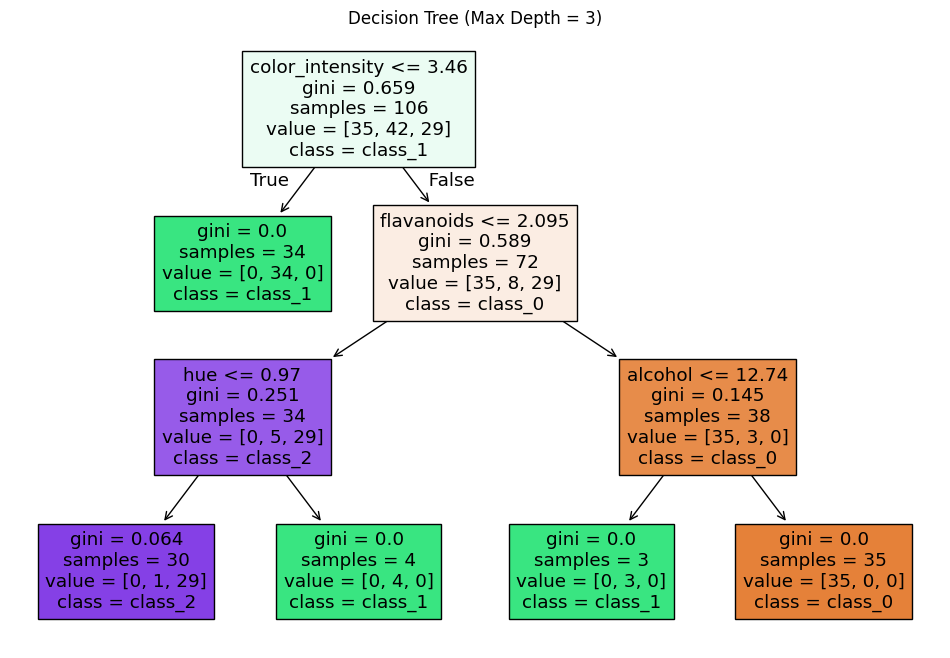

In [15]:
# PART E

from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree (Max Depth = 3)")
plt.show()

PROBLEM #2:


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.datasets import cifar10

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# combine train and test sets
X = np.vstack((X_train, X_test))
y = np.hstack((y_train.ravel(), y_test.ravel()))  # flatten labels

# flatten images
X_flat = X.reshape(X.shape[0], -1)

# train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_flat, y)

# get feature importances
feature_importances = rf.feature_importances_

# print feature importances
print(feature_importances)


[0.00029222 0.00028866 0.00039641 ... 0.00040679 0.00031969 0.00041299]


PROBLEM #3:


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# mount drive
from google.colab import drive
drive.mount('/content/drive')

# Load surface temperature data
file_path = "/content/drive/My Drive/Machine Learning Engineering/surface_temp.npy"
data = np.load(file_path)

#standardize
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# prepare for RNN
sequence_length = 20

X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)

# split into train and test sets
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape(-1, sequence_length, 1)
X_test = X_test.reshape(-1, sequence_length, 1)

# build model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# predict future timestamps
future_predictions = []
input_seq = X_test[-1].reshape(1, sequence_length, 1)

for _ in range(10):
    next_temp = model.predict(input_seq)[0, 0]
    future_predictions.append(next_temp)
    input_seq = np.append(input_seq[:, 1:, :], [[[next_temp]]], axis=1)

# convert predictions back to original temperature scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# print the future predictions (actual temperature values)
print("Future 10 Timesteps Predictions (in Actual Temperature Scale):", future_predictions)






































Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 20, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3842 - val_loss: 0.0314
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0351 - val_loss: 0.0343
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0345 - val_loss: 0.0278
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0298 - val_loss: 0.0271
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0257 - val_loss: 0.0279
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0294 - val_loss: 0.0270
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0293 - val_loss: 0.0278
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0275 - val_loss: 0.0283
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0299 - val_loss: 0.0275
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0267 - val_loss: 0.0277
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0226 - val_loss: 0.0253
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0